# Real Estate Price Analysis

The real estate dataset used in this assignment contains historical data from certain real estate markets between June 2012 and May 2013. 

It is related to two districts in Taipei City and two districts in New Taipei City. 

<br>

The dataset is composed of 414 records of property sales and the features describe certain aspects of the properties sold. This data is sourced from the UCI machine learning webpage, where this another other datasets are [publicly accessible](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

The following table provides a summary of each feature in the dataset: 

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.


| Variable  | Meaning | Type |
| ------------- | ------------- | ------------- |
| X1 Transaction Date|  Month in which the transaction has happened starting counting from the first month of the dataset |  for example 2013.250=2013 March |
| X2 house age | The house age  | Unit (year) |
| X3 distance to the nearest MRT station | The distance to the nearet MRT station | Numerical (meters) |
| X4 number of convenience stores | The number of convenience stores in the living circle on foot | Numerical (integer) | 
| X5 latitude | The geographic coordinate, latitude | numerical (degree)| 
| X6 longitude | The geographic coordinate, longitude | numerical (degree) | 
| Y house price of unit area | Output variable, house price of unit area | numerical (10000 New Taiwan Dolla/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Having inspected what the features mean, let's begin by importing the libaries needed for this assignment:

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Load the dataset

With these libaries, in particular `pandas`, let's load the `real_estate_valuation_data_set.csv` file, which is located in a folder called `data`, into a DataFrame named `df` using the following code:

In [2]:
df = pd.read_csv('../data/real_estate_valuation_data_set.csv')
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Dataset Preprocessing 

Before proceeding to the analysis, let's first do some preprocessing to clean our data and get a better sense of what it looks like.

<br>

**1. Print the format of your dataframe (number of rows, columns) and, store whether or not the dataframe contains any missing values in a variable called `values_missing`.**

Note that `values_missing` should be a Boolean.

*Hint: you can use two `pandas` methods, [`.isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) and [`.any()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) applied to your dataframe to get this information.*

In [6]:
# Your code here 
df.info()
values_missing = df.isnull().sum()
values_missing[values_missing > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


Series([], dtype: int64)

**2. Remove the first column `X1 transaction date`from the dataset and save the newly created dataset into a new variable `df_new`.**

You should also use the `.copy()` method when creating `df_new`.

In [7]:
# Your code here
df_new = df.drop('X1 transaction date', axis=1).copy()


**3.  Plot a histogram of the target variable `Y house price of unit area`.**

This is an important preliminary step to help us understand the distribution of the target variable. For example you can see if it resembles a normal distribution, or if it is skewed in some way, and adjust your model accordingly.

Assign the output to a variable called `hist_y`.

*Hint: use the `.hist()` method on a `pandas` `Series`*

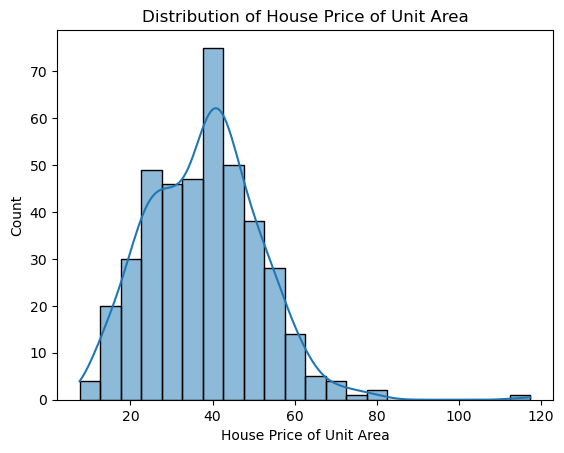

In [11]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here
hist_y = df_new['Y house price of unit area'].values
sns.histplot(hist_y, kde=True)
plt.xlabel('House Price of Unit Area')
plt.ylabel('Count')
plt.title('Distribution of House Price of Unit Area')
plt.show()


**4. Plot histograms of all of the remaining input variables in your dataframe.**

Note that we have already dropped the `X1 transaction date` variable, which leaves us with five variables (`X2` through `X6`).

<br>

To create these plots:
  - Use the `fig, ax = plt.subplots(figsize=(10,25), dpi=50)` to create your figure and axes
  - Filter down `df_new` to the relevant columns and call `.hist()` passing in:
     - `ax=ax`
     - `layout=(5,1)`
     - and the column names, ordered from `X2` to `X6`

Assign the output of `.hist()` to a variable called `hist_per_input`.

C:\Users\ssmith1\AppData\Local\Temp\ipykernel_25964\3189542782.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].hist(


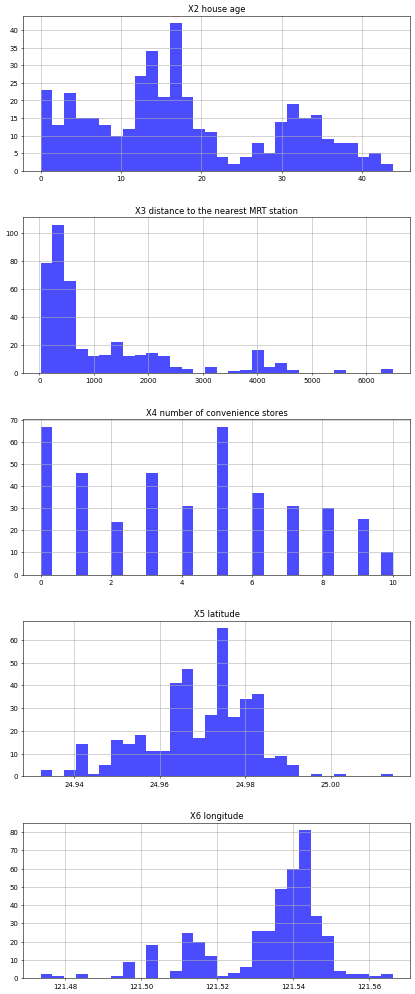

In [12]:
# We create a new figure to make sure other figures in the notebook don't get modified
fig, ax = plt.subplots(figsize=(10, 25), dpi=50)

# Filter down to the relevant columns and plot histograms
hist_per_input = df_new[['X2 house age', 'X3 distance to the nearest MRT station',
                         'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].hist(
    ax=ax, layout=(5, 1), bins=30, color='blue', alpha=0.7
)

**5. Obtain the mean and median of the variable outcome `Y house price of unit area`.**

Store the results in variables called `mean` and `median`. 


In [13]:
# Your code here
house_price_mean = df_new['Y house price of unit area'].mean()
house_price_median = df_new['Y house price of unit area'].median()


**6. Scale all the dataframe columns but `Y house price of unit area`, that is our output. For scaling use the min-max normalization. Save the newly scaled dataframe into a new dataframe named `df_new_scaled`.**

The min max scaling formula (considering you want to scale between 0 and 1) is as follows: 

```Python
df_new_scaled = (originalDataframe - min_val_originalDF) / (max_val_originalDF - min_val_originalDF) 
```

In [14]:
# Your code here
# Scale all columns except 'Y house price of unit area'
columns_to_scale = ['X2 house age', 'X3 distance to the nearest MRT station',
                    'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

df_new_scaled = df_new.copy()
df_new_scaled[columns_to_scale] = (df_new[columns_to_scale] - df_new[columns_to_scale].min()) / \
                                  (df_new[columns_to_scale].max() - df_new[columns_to_scale].min())

## Fitting a linear regression model

**7. Create a linear regression model and fit it to your data.**

First, create two variables: `X1` and `y1` whcih contain the input features and target variable, respectively.

Next, create linear regression model called `reg1` and fit it on `X1` and `y1`

*Hint: use the `sklearn.linear_model import LinearRegression` to perform linear regression.*

In [15]:
from sklearn.linear_model import LinearRegression

# Your code here

X1 = df_new_scaled[columns_to_scale]
y1 = df_new['Y house price of unit area']
reg1 = LinearRegression().fit(X1, y1)


**8. Print the value of the $R^2$ coefficient of the fitted linear regression and save it in a variable `reg1_R2`.**

The $R^2$ (pronounced "r-squared") coefficient is useful to understand how well your model has worked: the closer to 1, the better your model has worked!

To calculate the $R^2$, you can use the [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) method.

Store the coefficient in a variable called `reg1_R2`. 

In [16]:
# Your code here
reg1_R2 = reg1.score(X1, y1)


**9. Store the coefficients of the regression model `reg1` in a variable called `coefficients`**

Think about what this implies: 
 - Which features have a positive relationship with `Y house price of unit area`? 
 - Which ones are negative?

In [18]:
# Your code here
coefficients = reg1.coef_
coefficients


array([-11.77855728, -27.53346917,  11.63020477,  19.6205486 ,
        -0.72387769])

**10. Now create a new linear regression model using only the variables: `X2 house age`, `X5 latitude`,  and `X6 longitude`. Save the model in a variable called `reg2` and fit it to your new data.**

Before calling `.fit()` you should create two new dataframes for this new model:
 - `X2` which contains the input variables of interest
 - `y2` which contains the target variable

In [19]:
# Your code here
X2 = df_new_scaled[['X2 house age', 'X5 latitude','X6 longitude']]
y2 = df_new_scaled['Y house price of unit area']
reg2 = LinearRegression().fit(X2, y2)


**11. Now calculate the $R^2$ score for your new model.**

Store the score in a variable called `reg2_R2`.

Which model works best?

In [20]:
# Your code here
reg2_R2 = reg2.score(X2, y2)


**12. Divide the dataset into train and test set.**

Use the `train_test_split` from the `sklearn.model_selection` package to split the `df_new_scaled` dataframe into $4$ subsets: 
 - `X_train`
 - `X_test`
 - `y_train`
 - `y_test`

In doing so, specify the test size to be `0.25` and set the `random_state=101` for reproducibility.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=101)


**13. Create and fit a linear regression model to the training set, using all of the variables to predict `Y house price of unit area`.**  

Assign your model to a variable called `reg3`.

*Hint: use the `.fit()` method.*

In [ ]:
# Your code here
reg3 = LinearRegression().fit(X_train, y_train)

**14. Use the model to generate predictions on `X_test`.**

Save the predicted variables into a variable called `y_pred` 

In [24]:
# Your code here
reg3 = LinearRegression().fit(X_train, y_train)
y_pred = reg3.predict(X_test)


Once you have generated these predictions, uncomment the cell below to check out the accuracy score of your model. 

Think about what this metric [means](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). 
  - Is this a good model? 
  - Is mean squared error a good metric? 
  - How does this compare to $R^2$?

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

76.79718098396671